In [1]:
#Object Detection With Mobile Net SSD

In [2]:
#--Importing Required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#--Getting the pretrained model
net = cv2.dnn.readNetFromCaffe('E:/Downloads/CV Data/MobileNetSSD_deploy.prototxt.txt',
                               'E:/Downloads/CV Data/MobileNetSSD_deploy.caffemodel')

In [4]:
#--Categories we wish to detect
categories = {0:'background', 1:'person', 2: 'bird', 3 : 'sheep',4 : 'dog', 5 : 'cat', 6 : 'horse', 7 : 'lion',8 : 'tiger'}
classes = ['background','person','bird','sheep','dog','cat','horse','lion','tiger']

In [5]:
#--Loading the data we will be working with
image = cv2.imread('E:/Downloads/CV Data/cats&dogs.jfif')
#cv2.imshow('Cats&Dogs', image)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

In [7]:
#--Storing height and width of image
(h,w) = image.shape[:2]

In [8]:
#--Creating a blob 
blob = cv2.dnn.blobFromImage(cv2.resize(image, (300,300)),0.007843, (300, 300), 127.5)

In [9]:
blob.shape 
#For example, if you're processing a single color image (3 channels) with dimensions of 
#300x300 pixels and a batch size of 1, the shape of the blob will be (1, 3, 300, 300)
#Batch Size: If you're processing a single image, the batch size will be 1. 
#If you're processing multiple images in a batch, it will be greater than 1.

(1, 3, 300, 300)

In [10]:
#--Setting the framkework
net.setInput(blob)
detections = net.forward()

In [11]:
detections.shape

(1, 1, 100, 7)

In [12]:
colors = np.random.uniform(255, 0, size=(len(categories), 3))

In [13]:
#colors

array([[ 10.12607812, 176.31401726, 226.27537295],
       [179.69457202, 150.16279272,   5.00642071],
       [ 91.7888525 ,  30.38682922,  52.69414488],
       [184.83834655, 203.79619546,  39.33451661],
       [203.4739514 , 145.37306011, 254.86412153],
       [117.22267521, 151.99194283, 123.15264955],
       [ 74.50231676, 149.77085348,  13.8620998 ],
       [ 44.14226826, 131.78000295, 134.61301469],
       [238.13351508, 193.01050595, 109.18271739]])

In [13]:
#--Detecting categories
for i in np.arange(0, detections.shape[2]):
    confidence = detections[0, 0, i, 2]
    if confidence > 0.2:
        idx = int(detections[0, 0, i, 1])

        # Check if idx is within the valid range for classes
        if 0 <= idx < len(classes):
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            (startX, startY, endX, endY) = box.astype("int")
            label = "{}: {:.2f}%".format(classes[idx], confidence * 100)
            cv2.rectangle(image, (startX, startY), (endX, endY), colors[idx], 2)
            y = startY - 15 if startY - 15 > 15 else startY + 15
            cv2.putText(image, label, (startX, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, colors[idx], 2)

#cv2.imshow("Output", image)
#cv2.waitKey(5000)
#cv2.destroyAllWindows()


In [20]:
#detections[0,0,1,3:7]

array([0.03952922, 0.3960659 , 0.51282036, 0.9929748 ], dtype=float32)

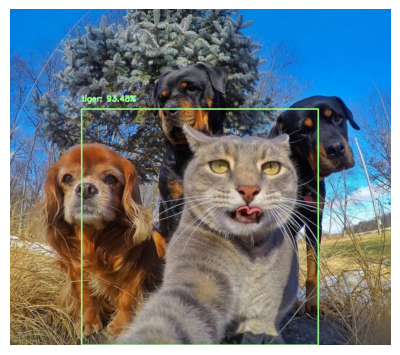

In [14]:
#--Visualizing the result
fig = plt.figure()
ax1 = fig.add_axes((0.1, 0.2, 0.8, 0.7))
plt.axis("off")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()